Лабораторная работа номер 3

Упражнение 1

In [4]:
import matplotlib.pyplot as plt

def building_a_sequence_of_partial_sums(func, n, k):
    partial_sums = []
    current_sum = 0
    for i in range(k, n+1):
        try:
            current_sum += func(i)
            partial_sums.append(current_sum)
        except ZeroDivisionError:
            print(f"Ошибка: деление на ноль при i = {i}")
            partial_sums.append(0)
        except ValueError:
            print("Ошибка: введены некорректные данные!")
    
    values = range(k, n+1)
    plt.plot(values, partial_sums, color='r')
    plt.title(f'График последовательности {func}')
    plt.xlabel('n')
    plt.ylabel('Частичная сумма')
    plt.grid(True)
    plt.show()

Ошибка: деление на ноль при i = 0


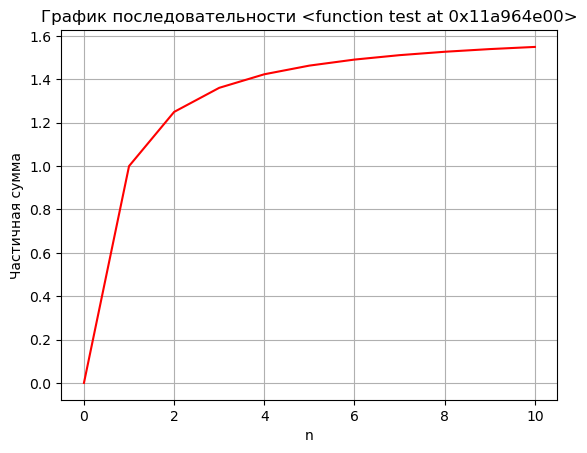

In [5]:
def test(x):
    return 1/(x**2)

building_a_sequence_of_partial_sums(test, 10, 0)

Упражнение 2

In [6]:
#a)
import sympy as sp

n, q = sp.symbols('n q')

sequence = q**n

# Ряд
series = sp.Sum(sequence, (n, 1, sp.oo))

for q_value in [0.5, 1, 2]:
    if abs(q_value) < 1:
        print(f"Ряд q**n при q = {q_value} сходится.")
        series_sum = series.subs(q, q_value).doit()
        print(f"Сумма ряда: {int(series_sum)}")
    else:
        print(f"Ряд q**n при q = {q_value} расходится.")


Ряд q**n при q = 0.5 сходится.
Сумма ряда: 1
Ряд q**n при q = 1 расходится.
Ряд q**n при q = 2 расходится.


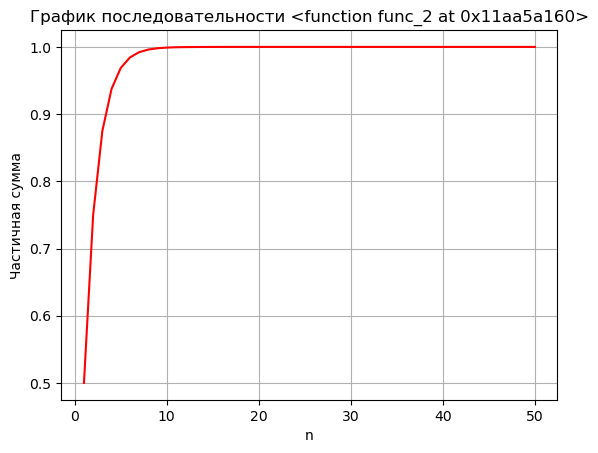

In [7]:
# б)

def func_2(x):
    q = 0.5
    return q**x

building_a_sequence_of_partial_sums(func_2, 50, 1)

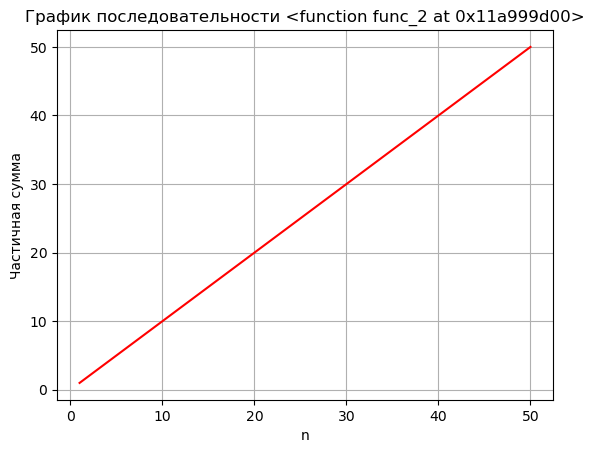

In [8]:
def func_2(x):
    q = 1
    return q**x

building_a_sequence_of_partial_sums(func_2, 50, 1)

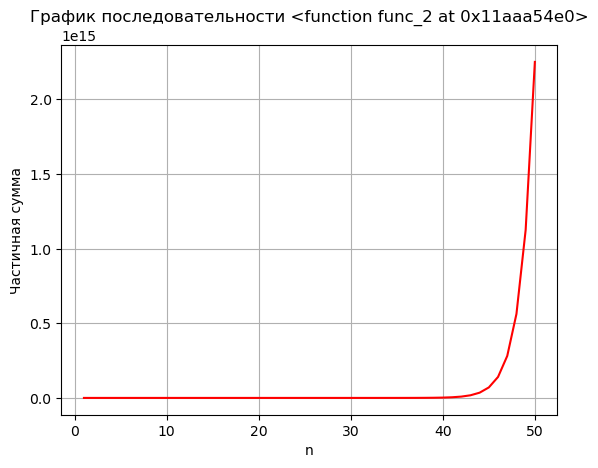

In [9]:
def func_2(x):
    q = 2
    return q**x

building_a_sequence_of_partial_sums(func_2, 50, 1)

Упражнение 3

In [10]:
#a)
import sympy as sp

n, a = sp.symbols('n a')
sequence = 1 / n**a

# Ряд
series = sp.Sum(sequence, (n, 1, sp.oo))

for a_value in [0.5, 1, 2]:
    if a_value > 1:
        print(f"Ряд 1/n**a при a = {a_value} сходится.")
        series_sum = series.subs(a, a_value).doit()
        print(f"Сумма ряда: {series_sum}")
    elif a_value == 1:
        print("Ряд 1/n**a является гармоническим и расходится.")
    else:
        print(f"Ряд 1/n**a при a = {a_value} расходится.")

Ряд 1/n**a при a = 0.5 расходится.
Ряд 1/n**a является гармоническим и расходится.
Ряд 1/n**a при a = 2 сходится.
Сумма ряда: pi**2/6


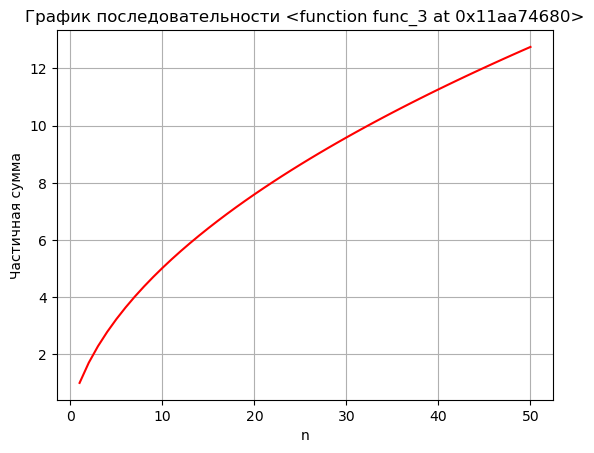

In [11]:
#б)

def func_3(x):
    a = 0.5
    return 1/(x**a)

building_a_sequence_of_partial_sums(func_3, 50, 1)

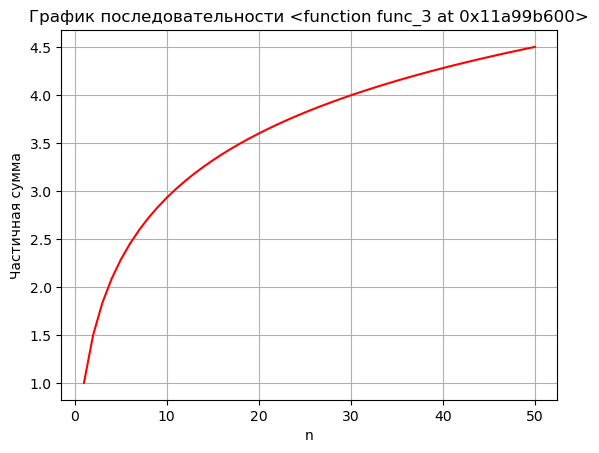

In [12]:
def func_3(x):
    a = 1
    return 1/(x**a)

building_a_sequence_of_partial_sums(func_3, 50, 1)

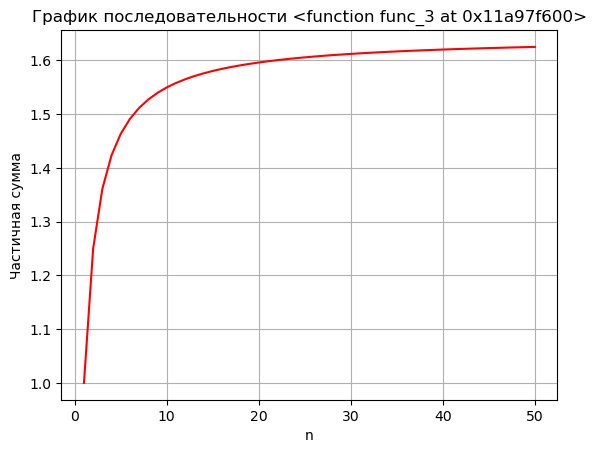

In [13]:
def func_3(x):
    a = 2
    return 1/(x**a)

building_a_sequence_of_partial_sums(func_3, 50, 1)

Упражнение 4

Количество членов =  10
1/n ** 0.5  |  0  |  4
1/n ** 1  |  0  |  2
1/n ** 2  |  0  |  1
1/(n**(1/2)+100  |  0  |  0
1000/(3*n**(1/3)+320)  |  0  |  27

Количество членов =  20
1/n ** 0.5  |  0  |  7
1/n ** 1  |  0  |  3
1/n ** 2  |  0  |  1
1/(n**(1/2)+100  |  0  |  1
1000/(3*n**(1/3)+320)  |  0  |  58

Количество членов =  30
1/n ** 0.5  |  0  |  9
1/n ** 1  |  0  |  3
1/n ** 2  |  0  |  1
1/(n**(1/2)+100  |  0  |  2
1000/(3*n**(1/3)+320)  |  0  |  88



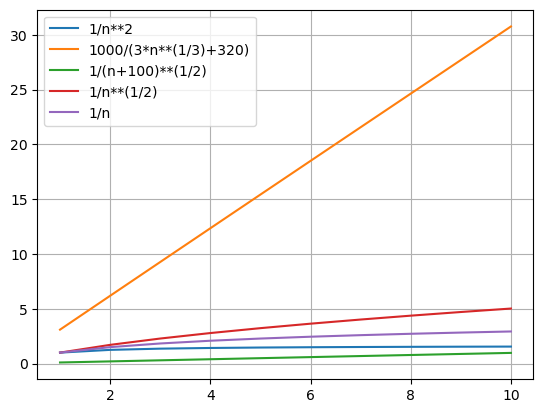

None


In [20]:
import numpy as np

alpha = [1/2, 1, 2]
n = sp.symbols('n')  

for k in range(1, 4):
    print("Количество членов = ", 10*k)
    for i in alpha:
        a = 1/n**i
        b = 1/(n+100)**(1/2)
        l = 1000/(3*n**(1/3)+320)
        s = 0
        c = 0
        counter = 0
        for j in range(1, 10*k):
            s += a.subs(n, j)  
            c += b.subs(n, j)
            counter += l.subs(n, j)
        print("1/n **",i, ' | ', sp.limit(1/n**i, n, np.inf), ' | ', int(s))
        
    print("1/(n**(1/2)+100", ' | ', sp.limit(1/(n**(1/2)+100), n, np.inf), ' | ', int(c))
    print("1000/(3*n**(1/3)+320)", ' | ', sp.limit(1000/(3*n**(1/3)+320), n, np.inf), ' | ', int(counter))
    print()
    
def draft(y, e):
    n = np.linspace(1, e, e)
    y1 = 1/n**2
    y2 = 1/n**(1/2)
    y3 = 1/n
    b = 1/(n+100)**(1/2)
    l = 1000/(3*n**(1/3)+320)
    for i in range(1, e):
        y1[i] += y1[i-1]
        b[i] += b[i-1]
        l[i] += l[i-1]
        y2[i] += y2[i-1]
        y3[i] += y3[i-1]
    plt.plot(n, y1, label='1/n**2')
    plt.plot(n, l, label='1000/(3*n**(1/3)+320)')
    plt.plot(n, b, label='1/(n+100)**(1/2)')
    plt.plot(n, y2, label='1/n**(1/2)')
    plt.plot(n, y3, label='1/n')
    plt.legend()
    plt.grid("True")
    plt.show()

n = sp.symbols('n')  
print(draft(1/n**2, 10))

как видно из данных, несмотря на то, что предел равен нулю, первый, второй, четвёртый и пятый ряды расходятся

Упражнение 5

Количество членов =  10
1/n ** 0.5  |  0  |  4
1/n ** 1  |  0  |  2
1/n**(1/2) + 1/n  |  0  |  7

Количество членов =  20
1/n ** 0.5  |  0  |  7
1/n ** 1  |  0  |  3
1/n**(1/2) + 1/n  |  0  |  10

Количество членов =  30
1/n ** 0.5  |  0  |  9
1/n ** 1  |  0  |  3
1/n**(1/2) + 1/n  |  0  |  13



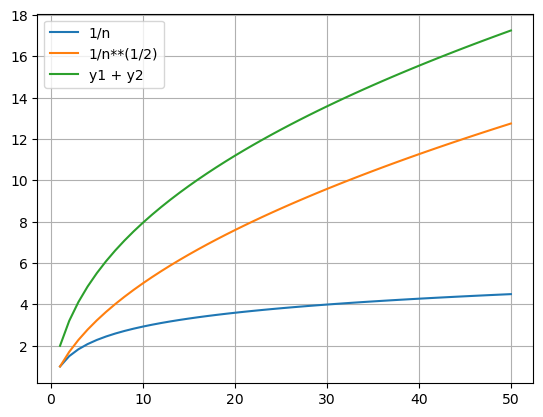

None


In [22]:
#a)

alpha = [1/2, 1]
n = sp.symbols('n')  


for k in range(1, 4):
    print("Количество членов = ", 10*k)
    for i in alpha:
        a = 1/n**i
        b = 1/n**(1/2) + 1/n
        s = 0
        c = 0
        for j in range(1, 10*k):
            s += a.subs(n, j)  
            c += b.subs(n, j)
        print("1/n **",i, ' | ', sp.limit(1/n**i, n, np.inf), ' | ', int(s))
    print("1/n**(1/2) + 1/n", ' | ', sp.limit(b, n, np.inf), ' | ', int(c))
    print()
    
def draft(y, e):
    n = np.linspace(1, e, e)
    y1 = 1/n
    y2 = 1/n**(1/2)
    y3 = y1 + y2
    for i in range(1, e):
        y1[i] += y1[i-1]
        y2[i] += y2[i-1]
        y3[i] += y3[i-1]
    plt.plot(n, y1, label='1/n')
    plt.plot(n, y2, label='1/n**(1/2)')
    plt.plot(n, y3, label='y1 + y2')
    plt.grid("True")
    plt.legend()
    plt.show()
n = sp.symbols('n')  
print(draft(1/n**(1/2), 50))

Если оба ряда расходятся, то ряд из их суммы также расходится

Количество членов =  10
1/n ** 1  |  0  |  2
1/n ** 2  |  0  |  1
1/n**2 + 1/n  |  0  |  4

Количество членов =  20
1/n ** 1  |  0  |  3
1/n ** 2  |  0  |  1
1/n**2 + 1/n  |  0  |  5

Количество членов =  30
1/n ** 1  |  0  |  3
1/n ** 2  |  0  |  1
1/n**2 + 1/n  |  0  |  5



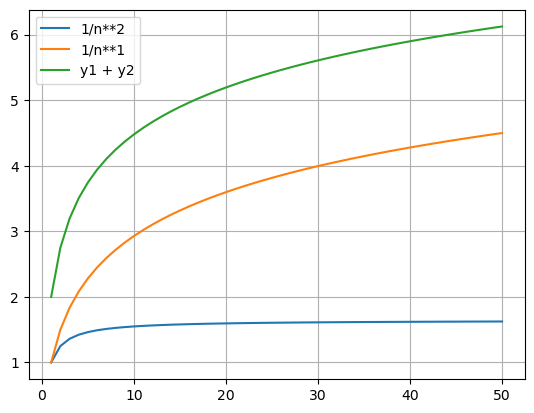

None


In [26]:
# б)

alpha = [1, 2]
n = sp.symbols('n')  


for k in range(1, 4):
    print("Количество членов = ", 10*k)
    for i in alpha:
        a = 1/n**i
        b = 1/n + 1/n**2
        s = 0
        c = 0
        for j in range(1, 10*k):
            s += a.subs(n, j)  
            c += b.subs(n, j)
        print("1/n **",i, ' | ', sp.limit(1/n**i, n, np.inf), ' | ', int(s))
    print("1/n**2 + 1/n", ' | ', sp.limit(b, n, np.inf), ' | ', int(c))
    print()
    
def draft(y, e):
    n = np.linspace(1, e, e)
    y1 = 1/n**2
    y2 = 1/n**1
    y3 = y1 + y2
    for i in range(1, e):
        y1[i] += y1[i-1]
        y2[i] += y2[i-1]
        y3[i] += y3[i-1]
    plt.plot(n, y1, label='1/n**2')
    plt.plot(n, y2, label='1/n**1')
    plt.plot(n, y3, label='y1 + y2')
    plt.grid("True")
    plt.legend()
    plt.show()
n = sp.symbols('n')  
print(draft(1/n**(1/2), 50))

ряд суммы исходных рядов сходится

Упражнение 6

In [27]:
# 1
n = sp.symbols('n')
r_b = 1/(n*(n+1)**(1/2)*(n+2)**(1/2))
r_m = 1/n**2 #больший сходящийся ряд
 
s = 0
c = 0
for j in range(1, 200):
    s += r_b.subs(n, j)  
    c += r_m.subs(n, j)
print("Первый ряд меньше второго ", int(s) < int(c), int(s), int(c), 'ряд сходится')

Первый ряд меньше второго  True 0 1 ряд сходится


In [28]:
# 2
n = sp.symbols('n') 
r_b = (2+sp.sin(n))/(n**(1/2))
r_m = 1/n**(1/2) #меньший расходящийся ряд
s = 0
c = 0
for j in range(1, 100):
    s += r_b.subs(n, j)  
    c += r_m.subs(n, j)
print("Первый ряд больше второго ", int(s) > int(c), int(s), int(c), 'ряд расходится')

Первый ряд больше второго  True 37 18 ряд расходится


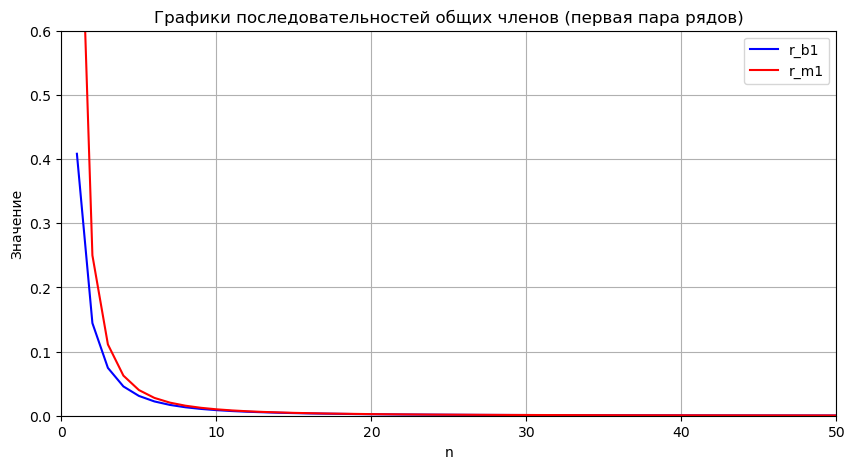

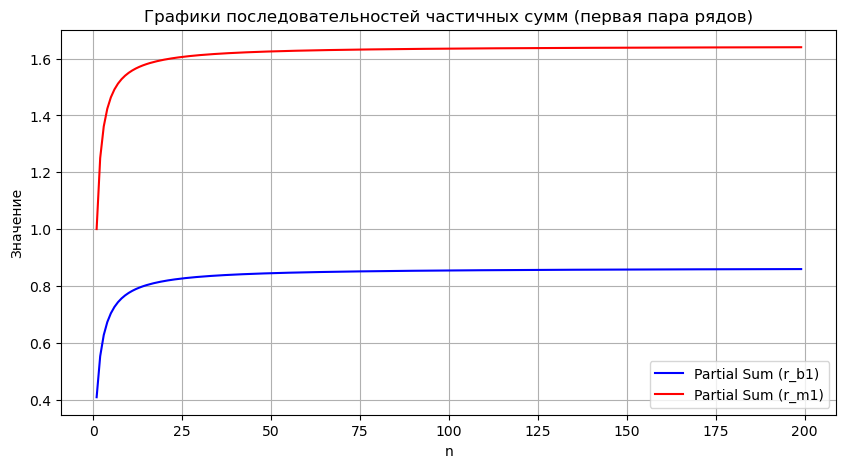

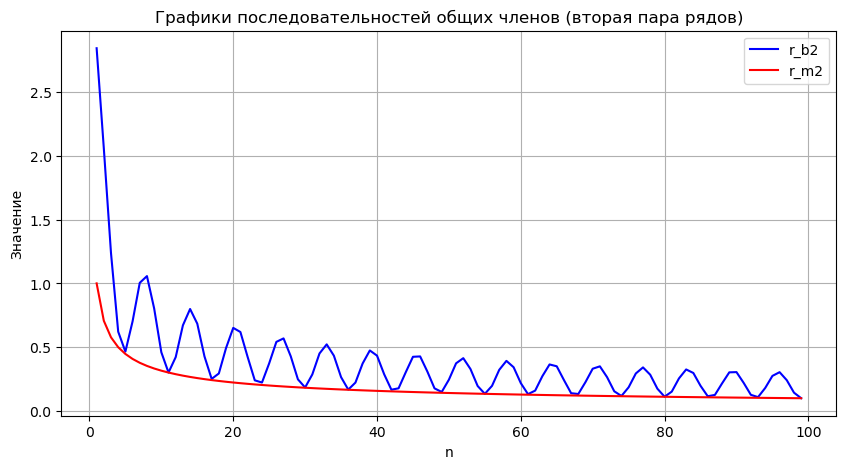

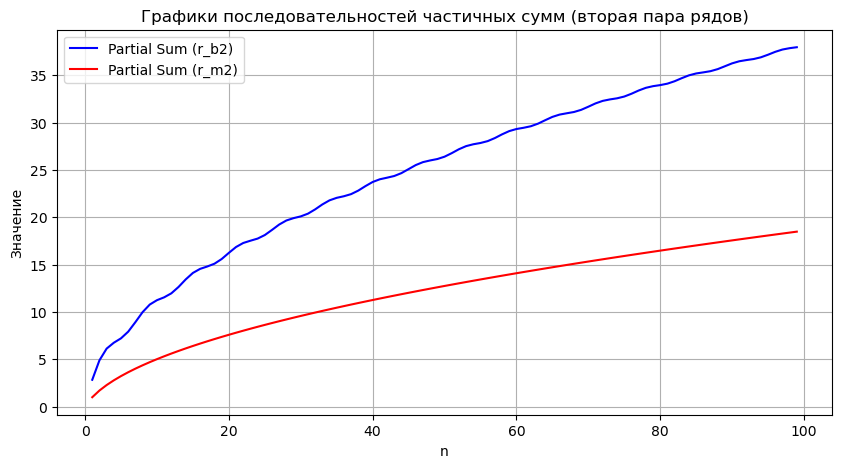

In [36]:
# б)

import sympy as sp
import matplotlib.pyplot as plt

# Определение символов
n = sp.symbols('n')

# Первый ряд
r_b1 = 1/(n*(n+1)**(1/2)*(n+2)**(1/2))
# Второй ряд
r_m1 = 1/n**2

# Графики последовательностей общих членов
n_values = range(1, 200)
r_b1_values = [r_b1.subs(n, j) for j in n_values]
r_m1_values = [r_m1.subs(n, j) for j in n_values]

plt.figure(figsize=(10, 5))
plt.plot(n_values, r_b1_values, label='r_b1', color='blue')
plt.plot(n_values, r_m1_values, label='r_m1', color='red')
plt.xlim(0, 50)
plt.ylim(0, 0.6)
plt.title('Графики последовательностей общих членов (первая пара рядов)')
plt.xlabel('n')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Графики последовательностей частичных сумм
s1, c1 = 0, 0
s_values1, c_values1 = [], []

for j in range(1, 200):
    s1 += r_b1.subs(n, j)
    c1 += r_m1.subs(n, j)
    s_values1.append(s1)
    c_values1.append(c1)

plt.figure(figsize=(10, 5))
plt.plot(n_values, s_values1, label='Partial Sum (r_b1)', color='blue')
plt.plot(n_values, c_values1, label='Partial Sum (r_m1)', color='red')
plt.title('Графики последовательностей частичных сумм (первая пара рядов)')
plt.xlabel('n')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


# Повторим для второй пары рядов

# Первый ряд
r_b2 = (2+sp.sin(n))/(n**(1/2))
# Второй ряд
r_m2 = 1/n**(1/2)

# Графики последовательностей общих членов
n_values = range(1, 100)
r_b2_values = [r_b2.subs(n, j) for j in n_values]
r_m2_values = [r_m2.subs(n, j) for j in n_values]

plt.figure(figsize=(10, 5))
plt.plot(n_values, r_b2_values, label='r_b2', color='blue')
plt.plot(n_values, r_m2_values, label='r_m2', color='red')
plt.title('Графики последовательностей общих членов (вторая пара рядов)')
plt.xlabel('n')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Графики последовательностей частичных сумм
s2, c2 = 0, 0
s_values2, c_values2 = [], []

for j in range(1, 100):
    s2 += r_b2.subs(n, j)
    c2 += r_m2.subs(n, j)
    s_values2.append(s2)
    c_values2.append(c2)

plt.figure(figsize=(10, 5))
plt.plot(n_values, s_values2, label='Partial Sum (r_b2)', color='blue')
plt.plot(n_values, c_values2, label='Partial Sum (r_m2)', color='red')
plt.title('Графики последовательностей частичных сумм (вторая пара рядов)')
plt.xlabel('n')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

Упражнение 7

In [48]:
import sympy as sp

def ocenka(y, e):
    n = sp.symbols('n')
    summa = 0
    i = 1
    while True:
        term = y.subs(n, i)
        if abs(term) < e:
            break
        summa += term
        i += 1
    return i, summa.evalf(n=5)

print(ocenka(1/2**n, 0.001))


(10, 0.99805)


Упражнение 8

In [49]:
n = sp.symbols('n') 
func = (3**n)/sp.factorial(n)
print(ocenka(func, 0.001))

(13, 19.085)


Упражнение 9

In [51]:
def ocenka1(y, e):
    i = 0
    summa = 0
    f = 1000000000
    while f >= e:
        i += 1
        f = y.subs(n, i)
        summa += f
    return i, summa

Упражнение 10

In [52]:
n = sp.symbols('n') 
func = (-1)**(n-1)/(sp.factorial(2*n-1))
print(ocenka1(func, 0.001))
print(5/6)

(2, 5/6)
0.8333333333333334


Точное значение sin(1) = 0.84147098...